In [11]:
from PIL import Image
from pytesseract import pytesseract
import cv2 as cv
import matplotlib.pyplot as plt

In [8]:
pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [6]:
image = Image.open('../../img/noisy_text.png')
image = image.resize((400,200))


In [9]:
text = pytesseract.image_to_string(image)
#print the text
print('detected text : ',text)

detected text :  Noisy, image
to test
Tesseract OCR



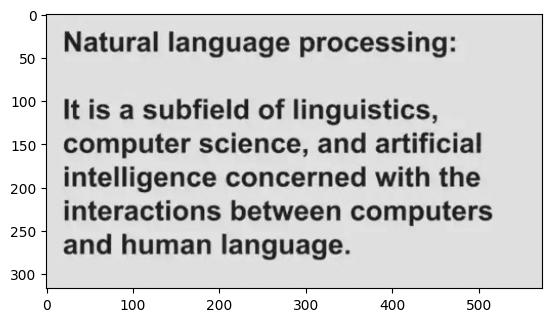

In [13]:
img = cv.imread("../../img/noisy_text_2.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

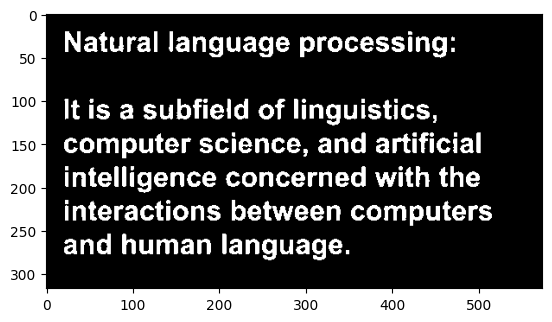

In [14]:
ret, thresh1 = cv.threshold(gray, 0, 255, cv.THRESH_OTSU |
                                          cv.THRESH_BINARY_INV)

plt.imshow(thresh1, cmap="gray")

In [16]:
rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, (12, 12))
rect_kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

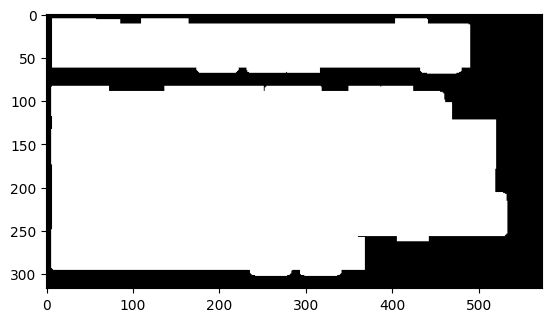

In [17]:
dilation = cv.dilate(thresh1, rect_kernel, iterations = 3)
plt.imshow(dilation, cmap="gray")

In [18]:
contours, hierarchy = cv.findContours(dilation, cv.RETR_EXTERNAL,
                                            cv.CHAIN_APPROX_NONE)

In [19]:
im2 = cv.imread("../../img/noisy_text_2.png")

In [20]:
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)

    # Draw the bounding box on the text area
    rect=cv.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Crop the bounding box area
    cropped = im2[y:y + h, x:x + w]

    # open the text file
    file = open("text_output2.txt", "a")

    # Using tesseract on the cropped image area to get text
    text = pytesseract.image_to_string(cropped)

    # Adding the text to the file
    file.write(text)
    file.write("\n")

    # Closing the file
    file.close

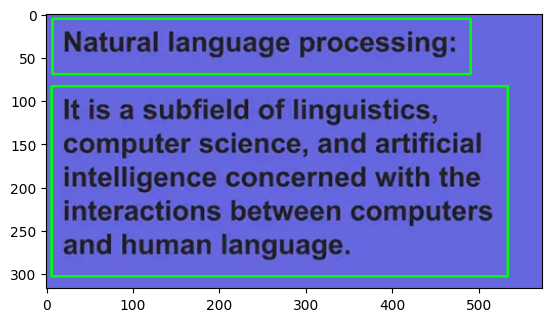

In [21]:
plt.imshow(im2)